# Necessary Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

We load the data from the csv file, normalize the data and return in training and testing format

In [4]:
def load_data(train_csv, test_csv):
    train_data = pd.read_csv(train_csv)
    test_data = pd.read_csv(test_csv)
    
    X_train = train_data.drop(columns=['label']).values / 255.0
    y_train = train_data['label'].values
    
    X_test = test_data.drop(columns=['label']).values / 255.0
    y_test = test_data['label'].values
    
    return X_train, y_train, X_test, y_test

# Other Functions

We define the necessary functions for the model, like the activation functions, loss calculations

In [6]:
# One hot encoding

def one_hot_encoding(y, num_classes):
    return np.eye(num_classes)[y]

# Activation functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Loss and Accuracy calculation

def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

# Multi Layer Perceptron Architecture

The Network has one input layer of size 784, one hidden layer of size 64 and one output layer of size 10. We use the sigmoid activation function for the hidden layer and softmax activation function for the output layer. We use the cross entropy loss function for the loss calculation.

In [21]:
class MLPNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        
    def forward_pass(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2
    
    def backward_pass(self, X, y_true, y_pred):
        m = X.shape[0]
        
        dz2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        dz1 = np.dot(dz2, self.W2.T) * sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        
    def train(self, X, y, epochs):
        self.loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward_pass(X)
            
            loss = cross_entropy_loss(y, y_pred)
            self.loss_history.append(loss)
            
            self.backward_pass(X, y, y_pred)
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
                
    def predict(self, X):
        y_pred = self.forward_pass(X)
        return np.argmax(y_pred, axis=1)
    
    def plot_loss(self):
        plt.plot(self.loss_history)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss vs Epochs')
        plt.show()

# Training the Model

In [13]:
X_train, y_train, X_test, y_test = load_data('data/mnist_train.csv', 'data/mnist_test.csv')

Epoch 0, Loss: 2.3025
Epoch 10, Loss: 2.3003
Epoch 20, Loss: 2.2993
Epoch 30, Loss: 2.2983
Epoch 40, Loss: 2.2971
Epoch 50, Loss: 2.2957
Epoch 60, Loss: 2.2940
Epoch 70, Loss: 2.2919
Epoch 80, Loss: 2.2893
Epoch 90, Loss: 2.2860
Epoch 100, Loss: 2.2819
Epoch 110, Loss: 2.2768
Epoch 120, Loss: 2.2703
Epoch 130, Loss: 2.2622
Epoch 140, Loss: 2.2521
Epoch 150, Loss: 2.2396
Epoch 160, Loss: 2.2243
Epoch 170, Loss: 2.2057
Epoch 180, Loss: 2.1834
Epoch 190, Loss: 2.1571
Epoch 200, Loss: 2.1264
Epoch 210, Loss: 2.0914
Epoch 220, Loss: 2.0521
Epoch 230, Loss: 2.0089
Epoch 240, Loss: 1.9622
Epoch 250, Loss: 1.9128
Epoch 260, Loss: 1.8615
Epoch 270, Loss: 1.8091
Epoch 280, Loss: 1.7563
Epoch 290, Loss: 1.7039
Epoch 300, Loss: 1.6523
Epoch 310, Loss: 1.6020
Epoch 320, Loss: 1.5533
Epoch 330, Loss: 1.5065
Epoch 340, Loss: 1.4616
Epoch 350, Loss: 1.4187
Epoch 360, Loss: 1.3779
Epoch 370, Loss: 1.3392
Epoch 380, Loss: 1.3025
Epoch 390, Loss: 1.2677
Epoch 400, Loss: 1.2347
Epoch 410, Loss: 1.2036
Epo

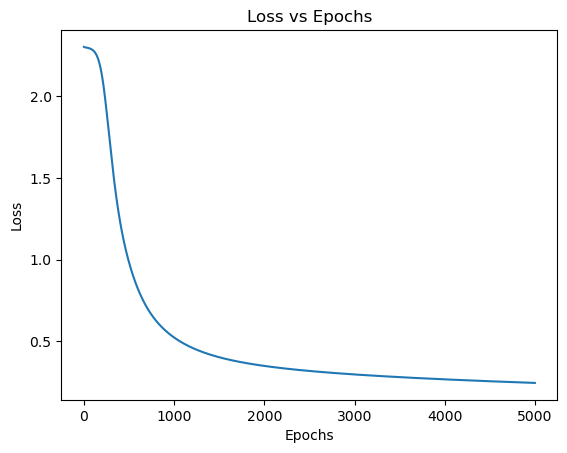

In [18]:
y_train_encoded = one_hot_encoding(y_train, 10)
y_test_encoded = one_hot_encoding(y_test, 10)

input_size = 784 
hidden_size = 64 
output_size = 10 
learning_rate = 0.1

nn = MLPNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(X_train, y_train_encoded, epochs=5000)

nn.plot_loss()

In [19]:
y_test_pred = nn.predict(X_test)
test_accuracy = accuracy(y_test_encoded, one_hot_encoding(y_test_pred, 10))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 93.01%


# Visualization of the Results

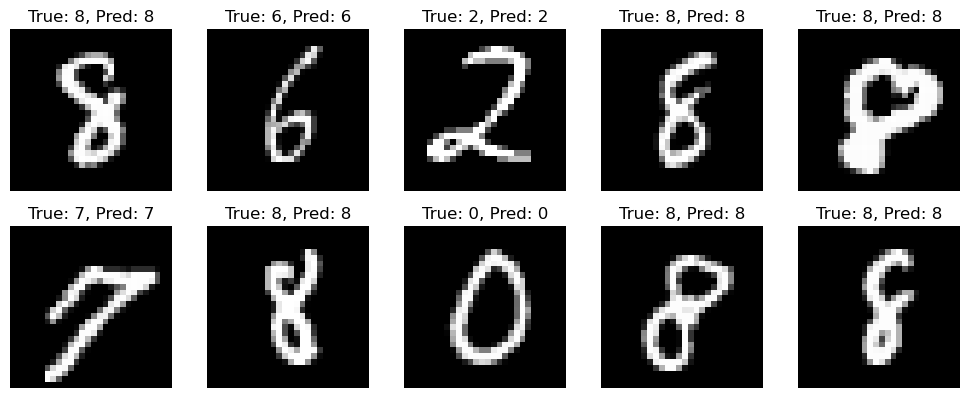

In [20]:
def plot_predictions(X_test, y_test, y_pred, num_samples=10):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_samples):
        idx = np.random.randint(0, X_test.shape[0])
        
        image = X_test[idx].reshape(28, 28)
        true_label = y_test[idx]
        predicted_label = y_pred[idx]
        
        plt.subplot(5, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {true_label}, Pred: {predicted_label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

y_test_pred = nn.predict(X_test)

plot_predictions(X_test, y_test, y_test_pred, num_samples=10)